## Objective
Create raster plots (plot spike trains) of matching units. For each unit from sorter1, plot spikes in three colors: spikes only detected by sorter1, only detected by sorter2, and detected by both.

In [1]:
# region Set up notebook imports
%load_ext autoreload
%autoreload 2
# Allow for imports of other scripts
import sys
PATH = "/data/MEAprojects/PropSignal"
if PATH not in sys.path:
    sys.path.append(PATH)
# Reload a module after changes have been made
from importlib import reload
# endregion

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from src import utils
from src.recording import Recording
from src.sorters.prop_signal import PropSignal
from src.sorters.kilosort import Kilosort
from src.comparison import Comparison

In [2]:
recording = Recording(utils.PATH_REC_SI, freq_min=300, freq_max=6000)

/home/mea/anaconda3/envs/allen_inst/lib/python3.7/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.1 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))
/home/mea/anaconda3/envs/allen_inst/lib/python3.7/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.5.0 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))
/home/mea/anaconda3/envs/allen_inst/lib/python3.7/site-packages/pynwb/ecephys.py:93: UserWarning: ElectricalSeries 'ElectricalSeries': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  "Your data may be transposed." % (self.__class__.__name__, kwargs["name"]))


In [25]:
# Load sorter1
sorter1 = PropSignal("/data/MEAprojects/dandi/000034/sub-mouse412804/prop_signal/230423", recording)
units1 = sorter1.get_spike_times()

In [4]:
# Load sorter2
sorter2 = Kilosort(utils.PATH_SM4_SI, "first", recording)
units2 = sorter2.get_spike_times()

In [6]:
# # Load which unit from sorter1 matches with sorter2
# idx_12 = np.load("/data/MEAprojects/dandi/000034/sub-mouse412804/prop_signal/2023_march_updated/max_ks_match/idx_12.npy")

Create raster

In [108]:
def raster_all(start_ms, end_ms):
    # All units
    def bound_spike_times(st):
        st = np.array(st)
        return st[(start_ms <= st) & (st <= end_ms)]
    def plot(axis):
        axis.plot((st)/1000, i1, color=c, marker=".", markersize=2, ls="", alpha=1)

    colors = ["green", "red", "blue"]
    titles = (f"{sorter1.name} spikes", f"Matching spikes", f"{sorter2.name} spikes", "All spikes")

    fig, ((a00, a01), (a10, a11)) = plt.subplots(2, 2, figsize=(10, 10))
    for i1 in tqdm(range(len(units1))):
        unit1 = bound_spike_times(units1[i1])
        unit2 = bound_spike_times(units2[idx_12[i1]])

        spike_times = Comparison.get_matching_spikes(unit1, unit2)
        colors_st = np.concatenate([[colors[j]] * len(spike_times[j]) for j in range(len(spike_times))])
        spike_times = np.concatenate(spike_times)

        ind_sorted = np.argsort(spike_times)
        for idx in ind_sorted:
            st = spike_times[idx]
            c = colors_st[idx]
            if c == colors[0]:
                plot(a01)
            elif c == colors[1]:
                plot(a00)
            else:
                plot(a10)
            plot(a11)

    for title, ax in zip(titles, (a00, a01, a10, a11)):
        ax.set_ylim(-1, len(units1))
        ax.set_xlim(start_ms/1000, (end_ms)/1000)
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Units")
        ax.set_title(title)
    plt.show()

100%|██████████| 141/141 [00:00<00:00, 738.04it/s]


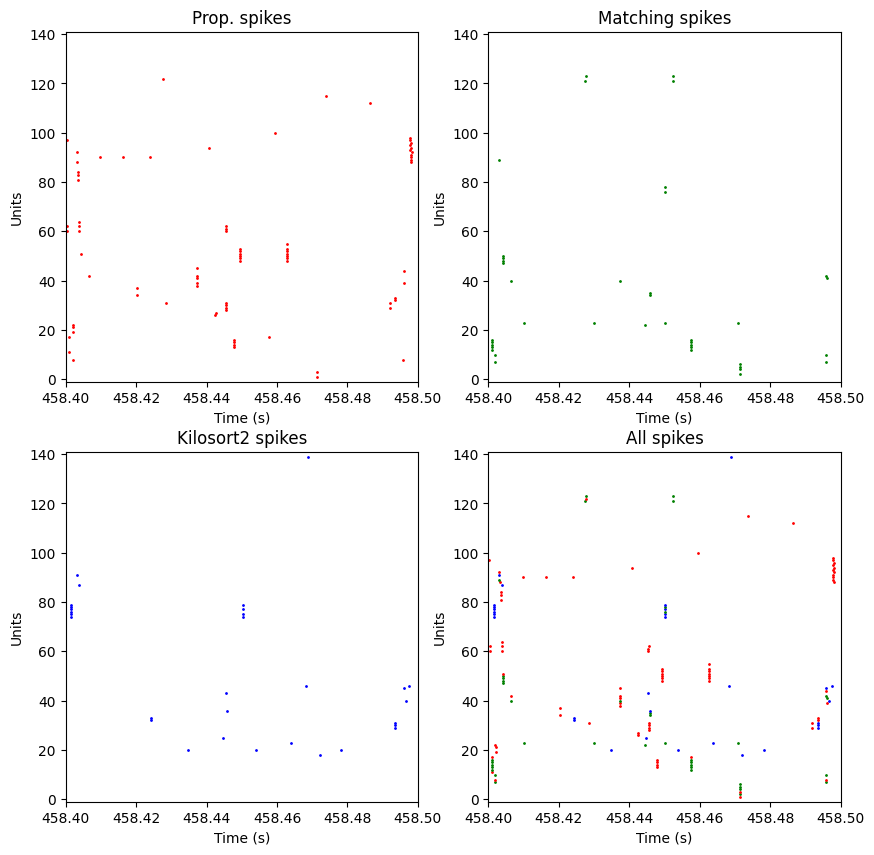

In [124]:
start_ms = 7.64 * 60 * 1000
end_ms = start_ms + 100
raster_all(start_ms, end_ms)

100%|██████████| 339/339 [00:00<00:00, 1362.04it/s]


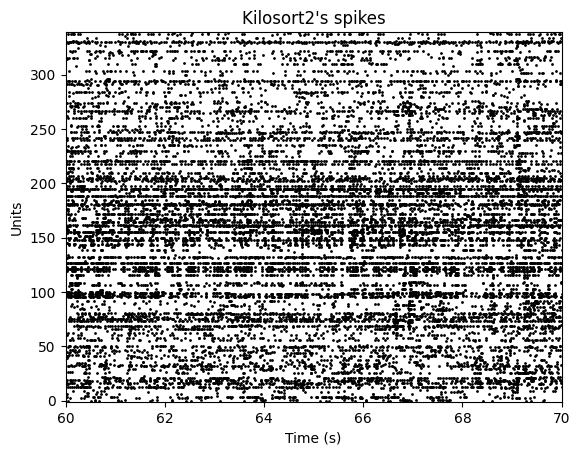

In [122]:
def test(start_ms, end_ms):
    def bound_spike_times(st):
        st = np.array(st)
        return st[(start_ms <= st) & (st <= end_ms)]

    fig, ax = plt.subplots(1)
    for i2 in tqdm(range(len(units2))):
        spike_times = bound_spike_times(units2[i2])
        ax.plot(spike_times/1000, np.ones_like(spike_times)*i2, color="black", marker=".", markersize=2, ls="", alpha=1)

        ax.set_ylim(-1, len(units2))
        ax.set_xlim(start_ms/1000, end_ms/1000)
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Units")
    ax.set_title(f"{sorter2.name}'s spikes")
    plt.show()
start_ms = 1 * 60 * 1000
end_ms = start_ms + 10 * 1000
test(start_ms, end_ms)

In [21]:
def raster(unit_idx, start_ms, end_ms):
    def bound_spike_times(st):
        st = np.array(st)
        return st[(start_ms <= st) & (st <= end_ms)]
    def plot(axis):
        axis.plot(st, 1, color=c, marker="|", markersize=100, ls="", alpha=1)

    colors = ["green", "red", "blue"]
    titles = (f"{sorter1.name} spikes", f"Matching spikes", f"{sorter2.name} spikes", "All spikes")

    fig, ((a00, a01), (a10, a11)) = plt.subplots(2, 2, figsize=(10, 3), tight_layout=True)
    unit1 = bound_spike_times(units1[unit_idx])
    unit2 = bound_spike_times(units2[idx_12[unit_idx]])

    spike_times = Comparison.get_matching_spikes(unit1, unit2)
    colors_st = np.concatenate([[colors[j]] * len(spike_times[j]) for j in range(len(spike_times))])
    spike_times = np.concatenate(spike_times)

    ind_sorted = np.argsort(spike_times)
    for idx in ind_sorted:
        st = spike_times[idx]
        c = colors_st[idx]
        if c == colors[0]:
            plot(a01)
        elif c == colors[1]:
            plot(a00)
        else:
            plot(a10)
        plot(a11)

    for title, ax in zip(titles, (a00, a01, a10, a11)):
        # ax.set_ylim(-1, len(units1))
        ax.set_xlim(start_ms-1, end_ms+1)
        ax.set_xlabel("Time (ms)")
        ax.set_yticks([])
        ax.set_title(title)
    plt.show()

def raster(unit_idx, start_ms, end_ms):
    def bound_spike_times(st):
        st = np.array(st)
        return st[(start_ms <= st) & (st <= end_ms)]
    def plot(axis):
        axis.scatter(st, 1, color=c, marker="|", s=450)

    colors = ["green", "red", "blue"]

    fig, ax = plt.subplots(1, figsize=(6.5, 1.5), tight_layout=True)
    # unit1 = bound_spike_times(units1[unit_idx])
    # unit2 = bound_spike_times(units2[idx_12[unit_idx]])
    unit1 = bound_spike_times(units1[128])
    unit2 = bound_spike_times(units2[309])

    spike_times = Comparison.get_matching_spikes(unit1, unit2)
    colors_st = np.concatenate([[colors[j]] * len(spike_times[j]) for j in range(len(spike_times))])
    spike_times = np.concatenate(spike_times)

    ind_sorted = np.argsort(spike_times)
    for idx in ind_sorted:
        st = spike_times[idx]
        c = colors_st[idx]
        plot(ax)

    ax.set_xlim(start_ms-1, end_ms+1)
    ax.set_xlabel("Time (ms)")
    ax.set_yticks([])
    # ax.set_title(title)
    plt.show()

In [10]:
def count_spikes(spike_train, start_ms, end_ms):
    left = np.searchsorted(spike_train, start_ms, side="left")
    right = np.searchsorted(spike_train, end_ms, side="right")
    return right - left

In [15]:
min_spikes = 6  # Min number of spikes in raster for raster to be plotted
duration = 500  # ms window of raster
print(f"Window firing rate: {min_spikes / duration * 1000} Hz")

Window firing rate: 12.0 Hz


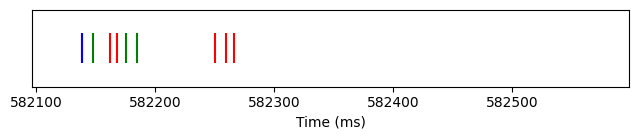

582125.3


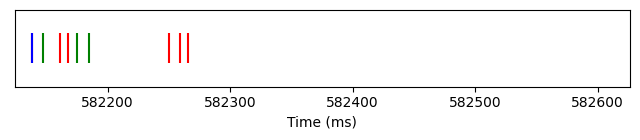

582134.6666666666


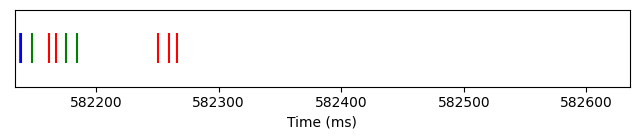

592314.4666666667


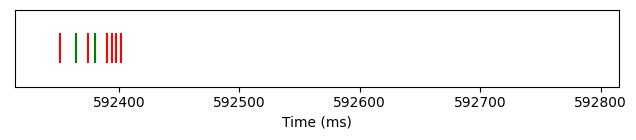

592330.4


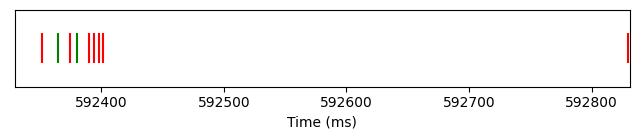

592804.0


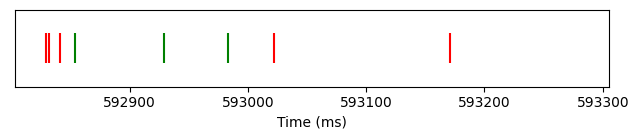

592879.3
592933.4666666667
594675.3333333334
595175.8666666667


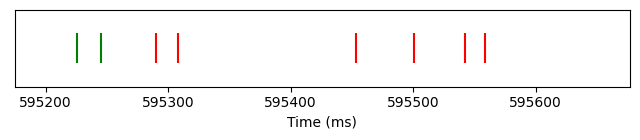

595195.1


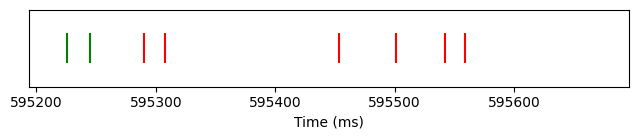

596894.8333333334
596942.3666666667
598350.1
598358.1333333333
601676.9333333333
601722.1666666666
603343.4
607738.1
607957.3666666667
610101.0333333333
610112.2
610165.0666666667
614627.2666666667
614639.5
616078.8333333334


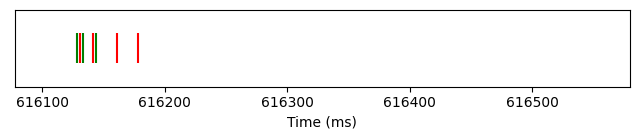

616083.7


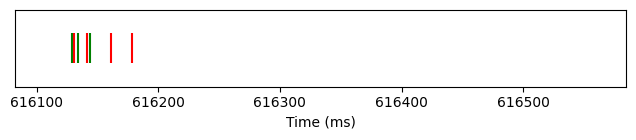

616093.9


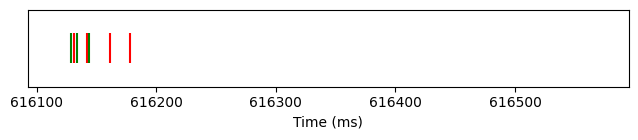

617728.7666666667
620305.2333333333
620371.0
629114.9666666667
631558.5
631569.0333333333
631650.7
633130.7
633162.4666666667
633868.8666666667
633885.8
639675.1333333333
644864.0333333333
644895.1666666666
646051.3


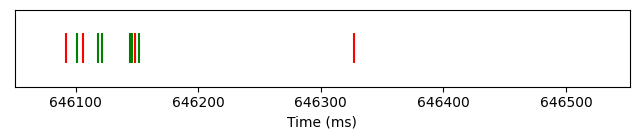

646067.9333333333


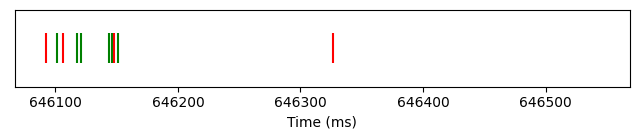

646071.3


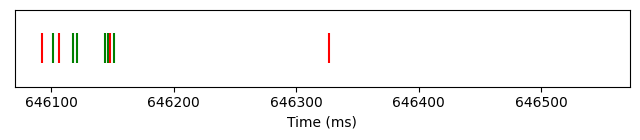

646093.9666666667


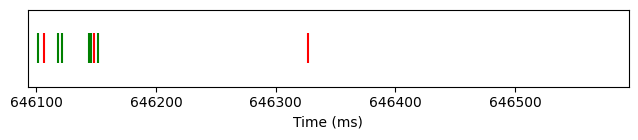

646096.0


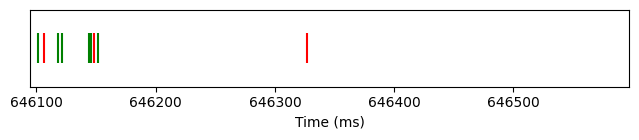

646101.3666666667


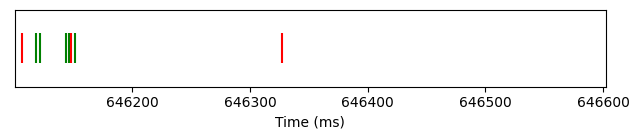

650745.4666666667
651002.5
654838.4666666667
656006.4
656529.8666666667
656730.5666666667
659655.4
660128.0666666667
662617.6
662755.3333333334
662791.3333333334
665982.8
666059.7333333333
666642.9333333333
673186.9


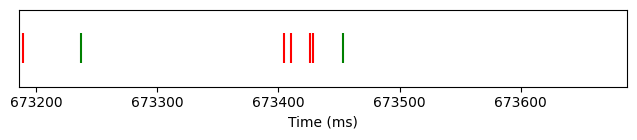

673403.4333333333


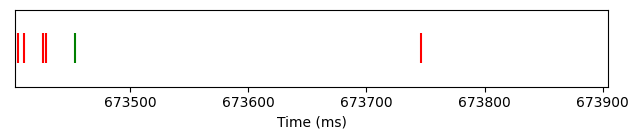

674458.4


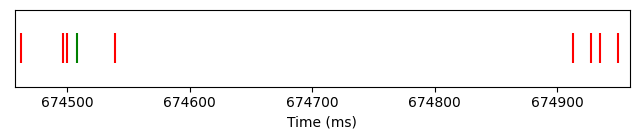

674998.7333333333
675040.3666666667
676278.1333333333
681313.8333333334
682078.3
685323.6
685491.6666666666
687659.0666666667
688648.4
692642.2666666667


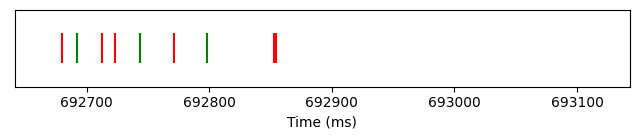

692693.4666666667


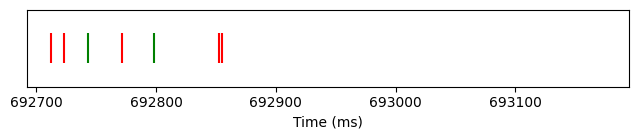

692748.3
693950.5
696643.6666666666
696771.5666666667
696811.4666666667
701926.0666666667
706134.3
707257.2333333333
707700.3333333334
707726.6333333333
708166.1333333333
708411.4666666667


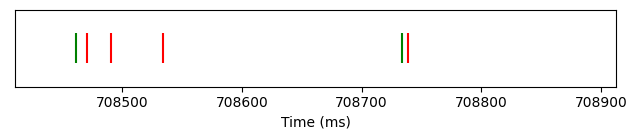

708683.7333333333
709157.8


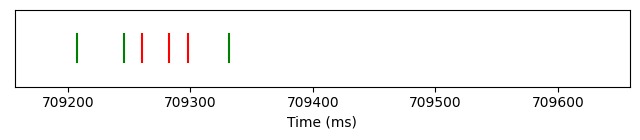

709196.1666666666


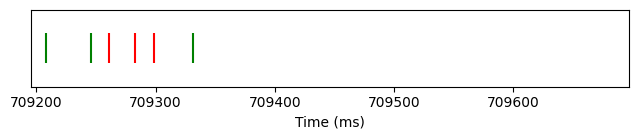

709281.7333333333
717172.0666666667
717186.6666666666
721041.8
723413.1666666666


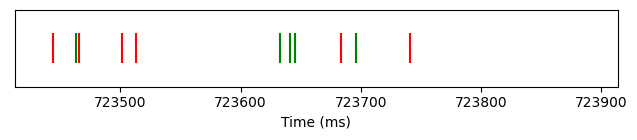

723582.5333333333


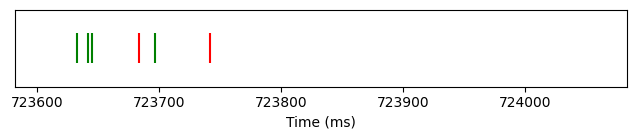

723591.1333333333


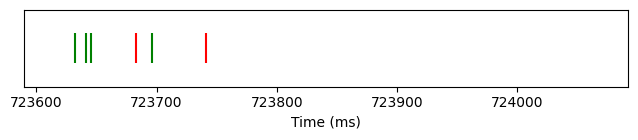

723595.1


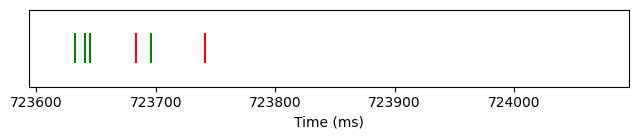

723646.0333333333
724532.8
725607.5
730247.1666666666


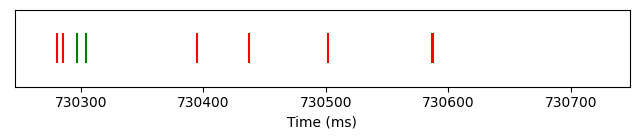

730254.2


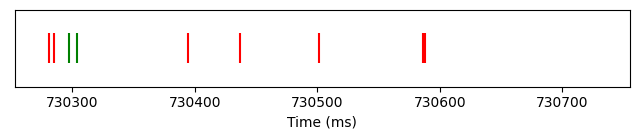

733447.4333333333
738112.9
739197.4
741195.6666666666
744944.4
745675.5333333333
745718.8
746727.7666666667


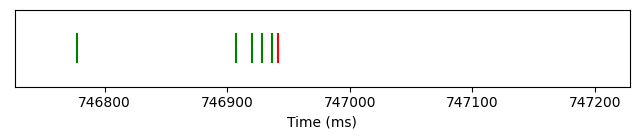

746857.6
746870.2
746878.1333333333
746886.6666666666
748779.9
748863.6666666666
754977.4333333333
755105.8
755975.5333333333


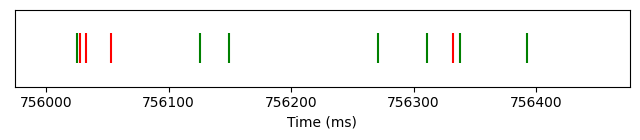

756075.4


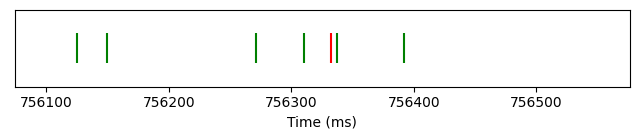

756099.3666666667


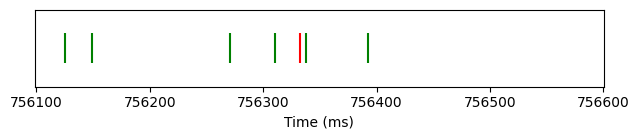

756220.8
756260.6333333333
756287.5
756342.1
757461.1


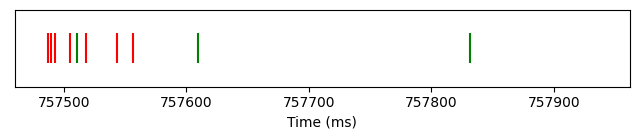

757559.3
757781.4333333333
763531.8
765225.7
767227.9
771984.8
772940.1666666666


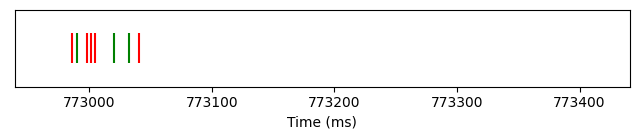

772969.7333333333


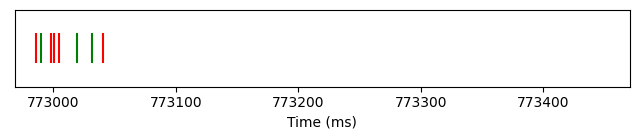

772982.0666666667


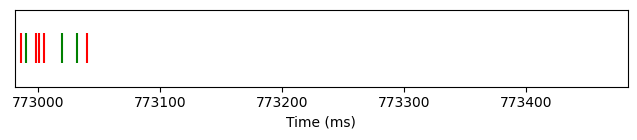

779249.0


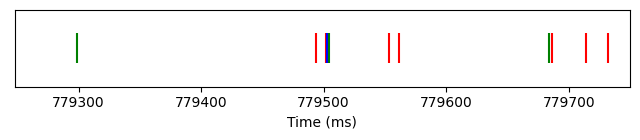

779454.4333333333


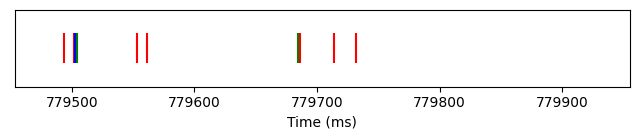

779634.2
780557.7
780618.6333333333
781007.1
787395.2
788973.6333333333
793000.0333333333
796487.3333333334
799287.3
800482.2333333333


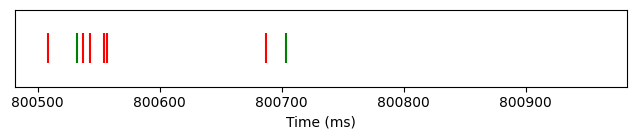

800653.7333333333
802229.9
802244.4666666667
804218.2
806219.6333333333
811761.6
811800.0333333333
814258.8
814292.9
814375.4666666667
816285.0333333333
816311.5
816333.1333333333
816346.1
818068.6333333333
819281.4666666667
819304.0333333333
820069.1333333333
822287.3
829220.3
830009.8333333334


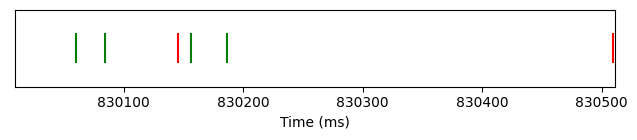

830034.3666666667


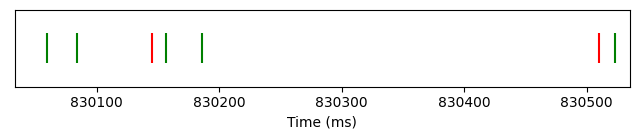

830106.3666666667
830136.4333333333
830473.3333333334
831074.2333333333
831835.1333333333
831864.3
835265.5333333333


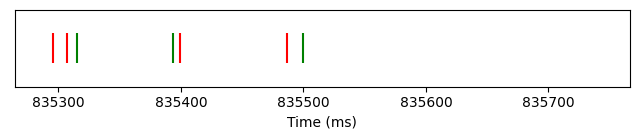

835343.9
835449.6
842580.0666666667
842977.9333333333
843038.6
852858.9
853034.7333333333
853734.2333333333
858058.8
858126.1
867993.1


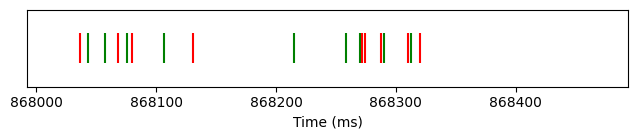

868007.5


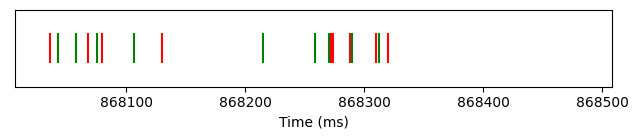

868025.4333333333


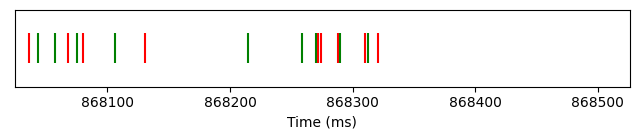

868056.2666666667


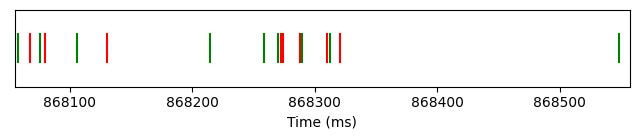

868164.7666666667


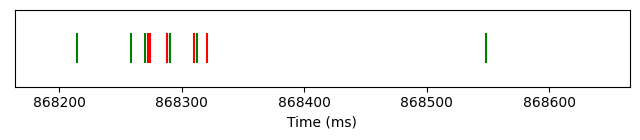

868208.3666666667


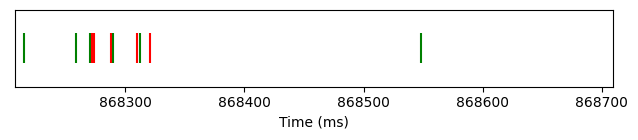

868220.2


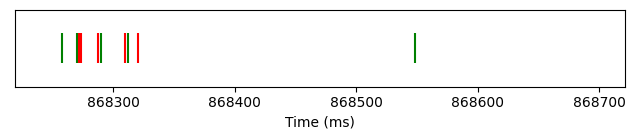

868240.0


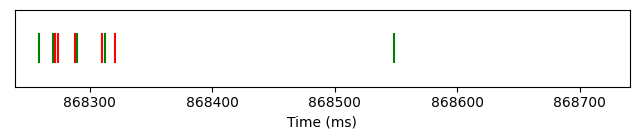

868262.5666666667


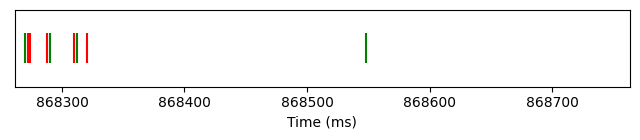

868498.1666666666
876110.9333333333


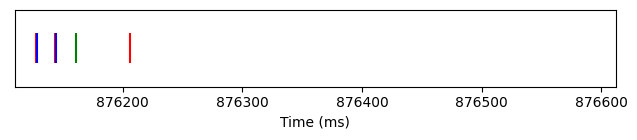

877531.4
883561.4
885803.6
885972.8
886691.1333333333
886714.8666666667
886726.2333333333
888787.1
889410.3333333334
889817.2666666667


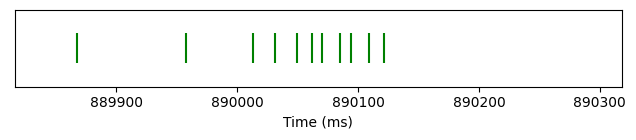

889907.7333333333


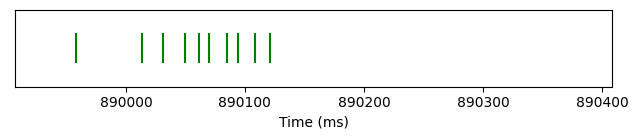

889963.5


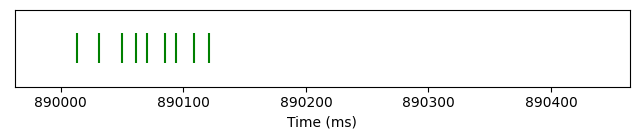

889981.0333333333


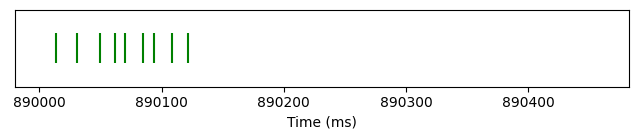

889999.6


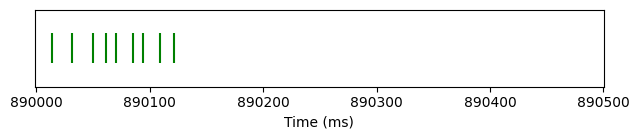

890011.7333333333


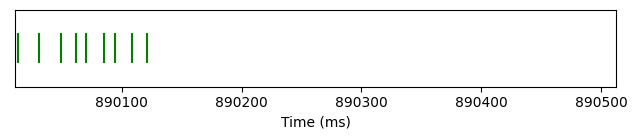

890020.0


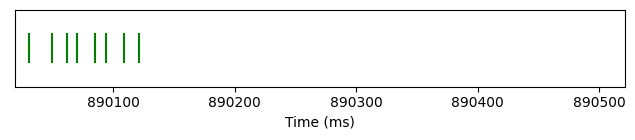

890035.0


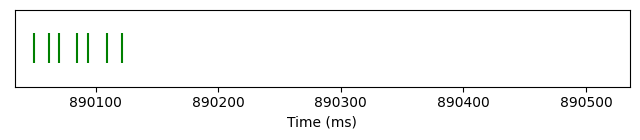

890043.9666666667


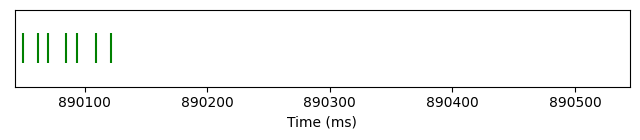

890058.8333333334


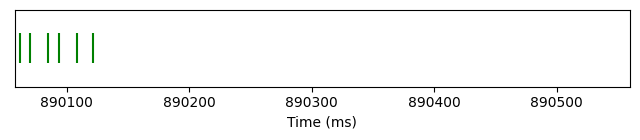

890071.2666666667
898402.8
1641
529


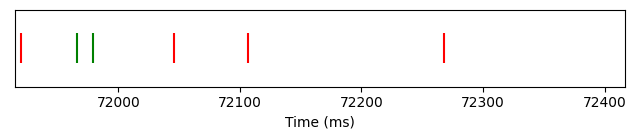

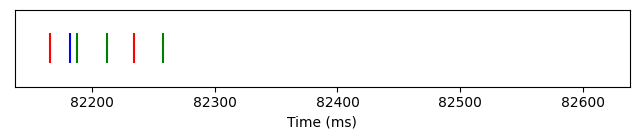

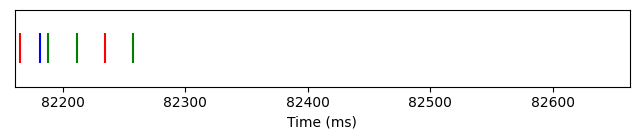

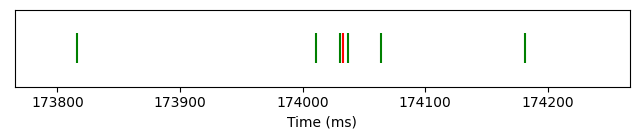

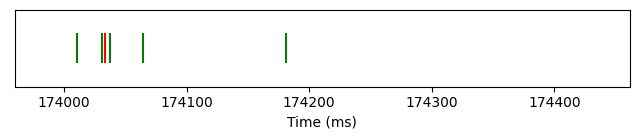

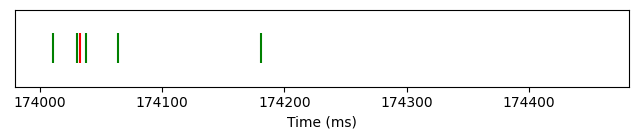

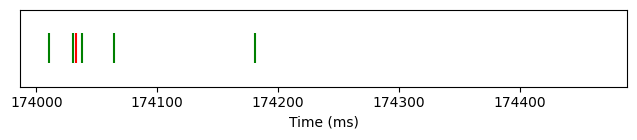

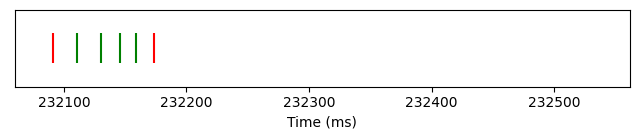

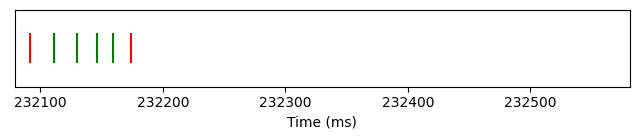

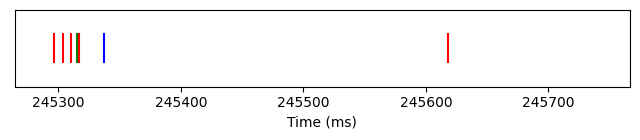

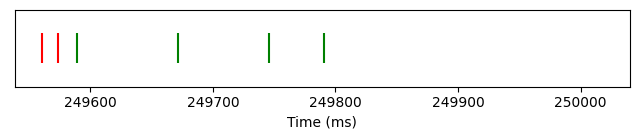

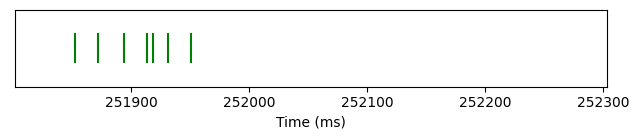

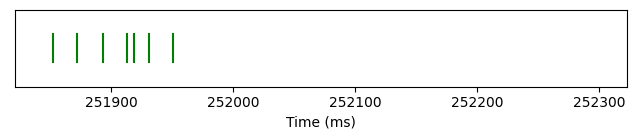

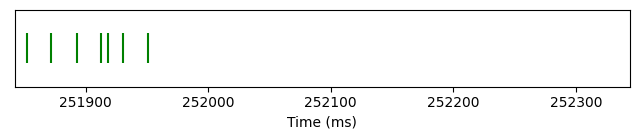

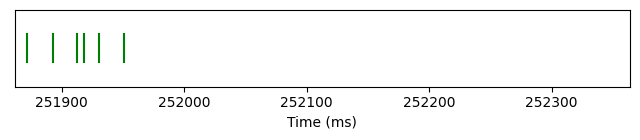

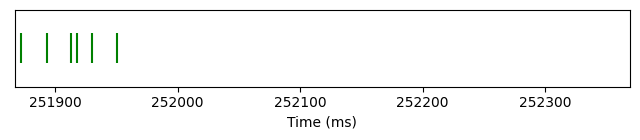

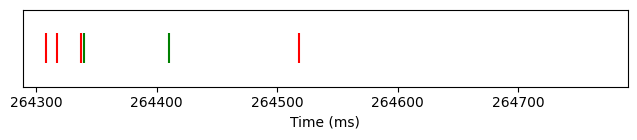

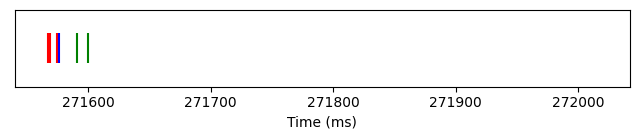

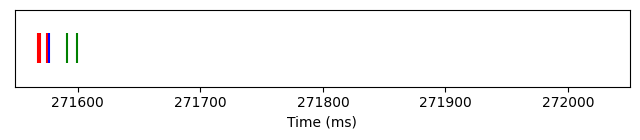

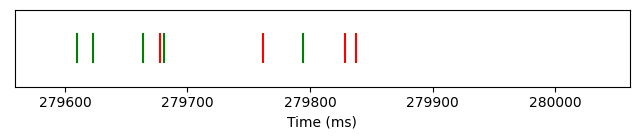

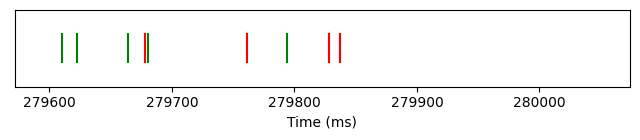

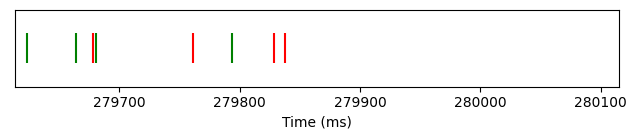

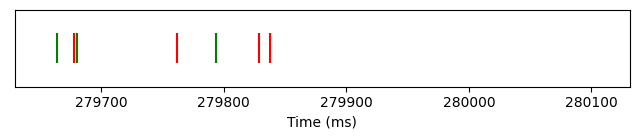

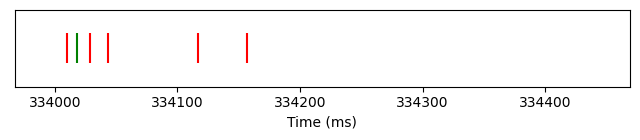

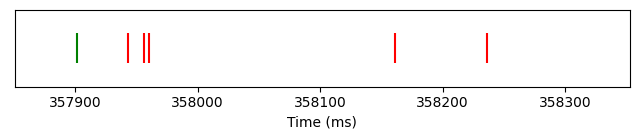

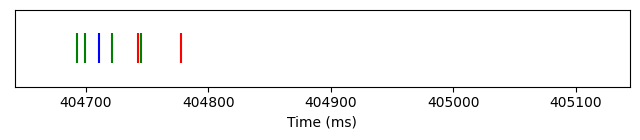

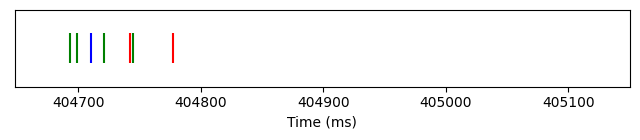

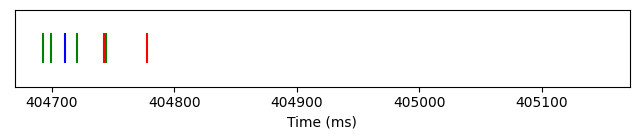

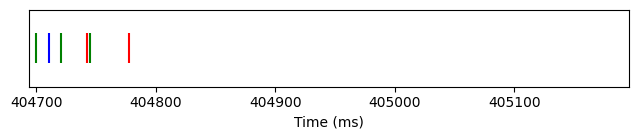

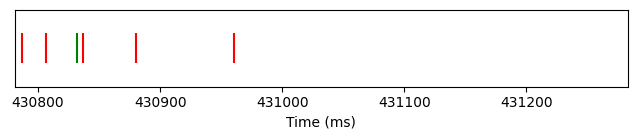

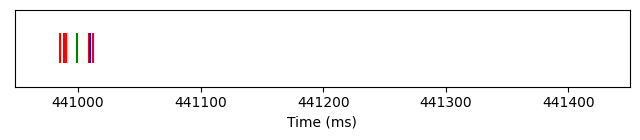

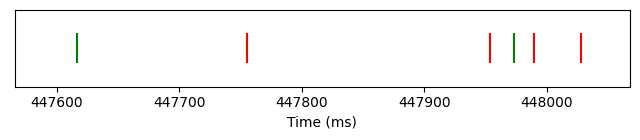

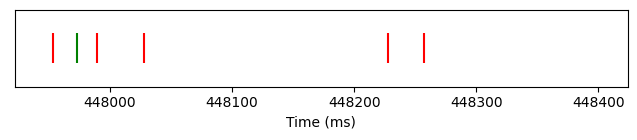

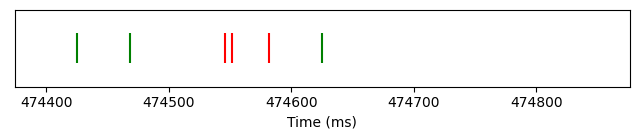

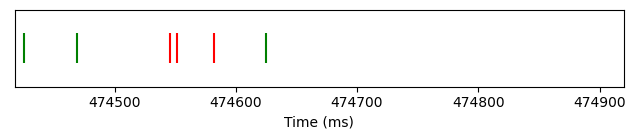

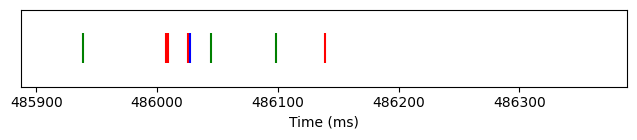

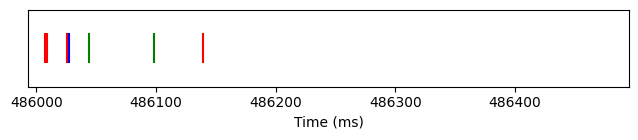

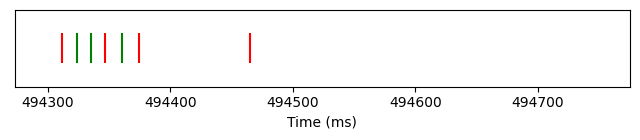

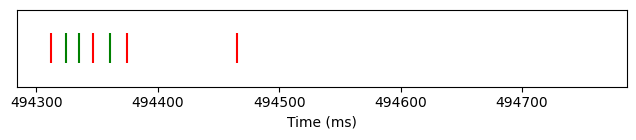

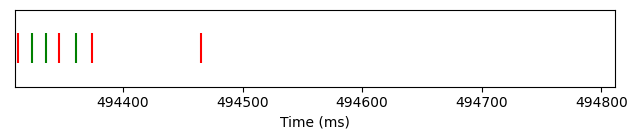

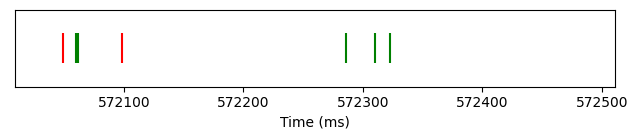

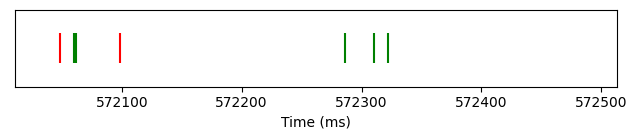

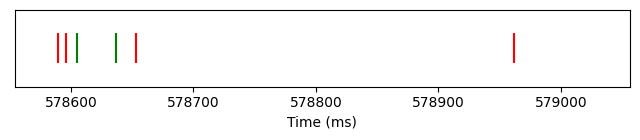

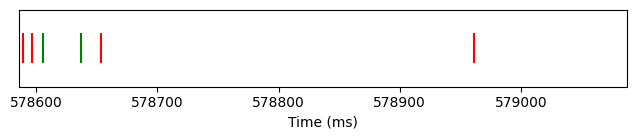

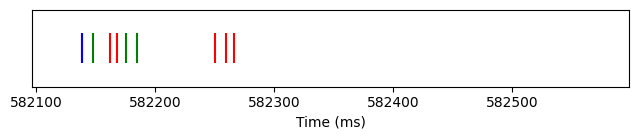

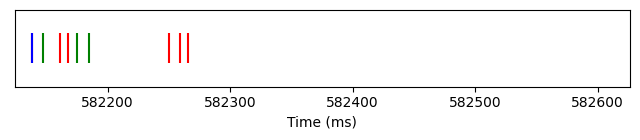

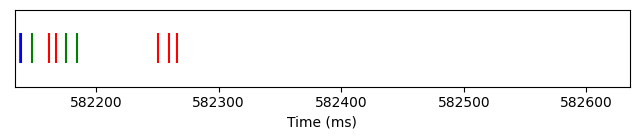

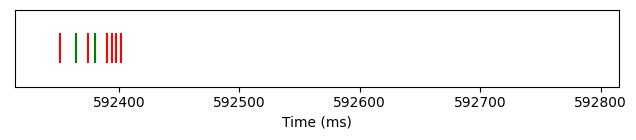

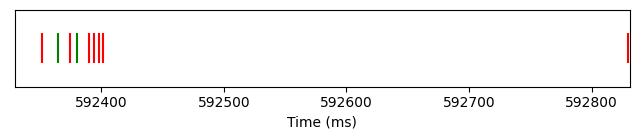

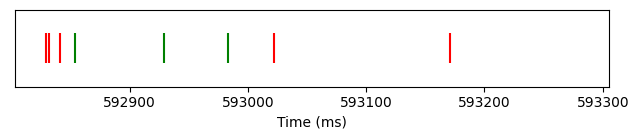

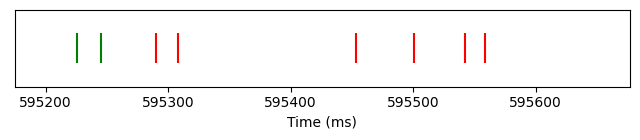

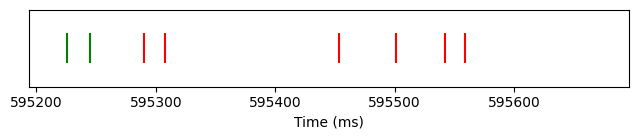

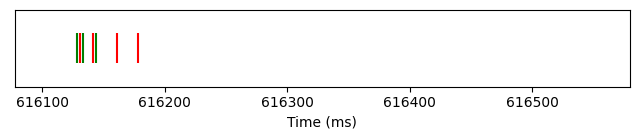

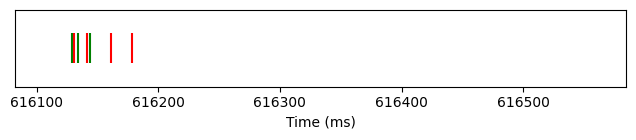

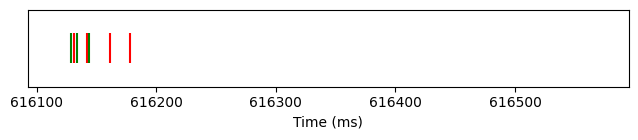

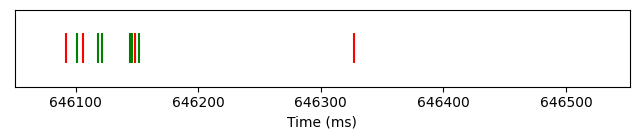

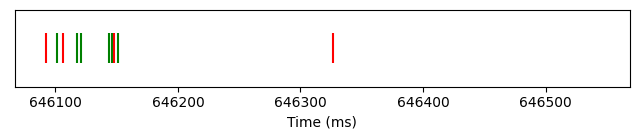

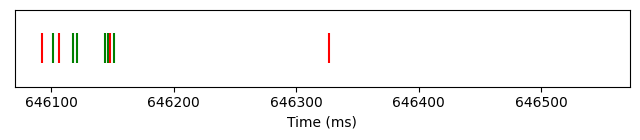

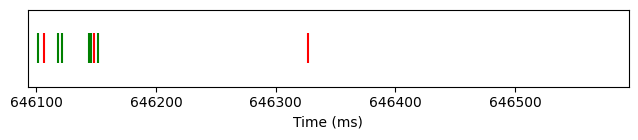

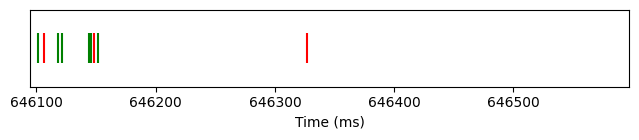

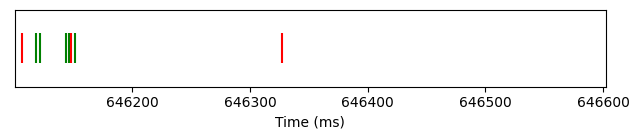

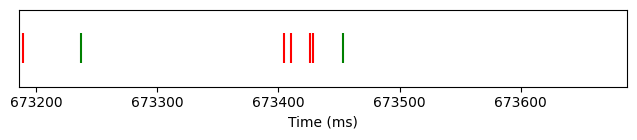

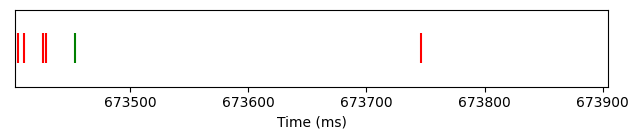

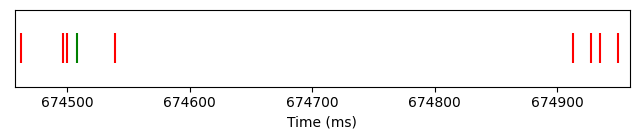

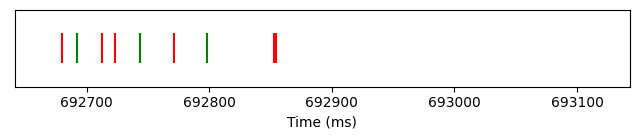

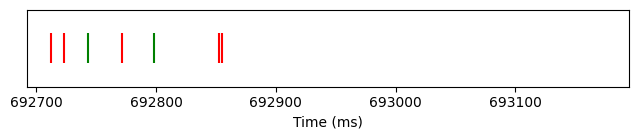

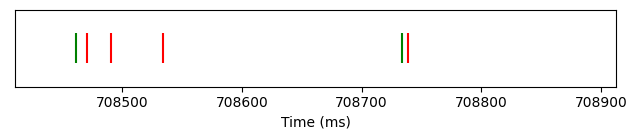

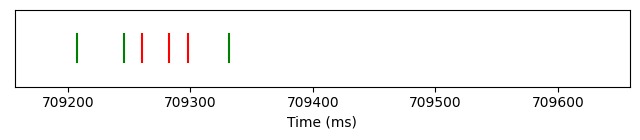

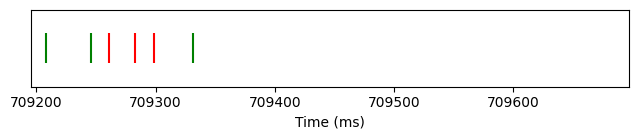

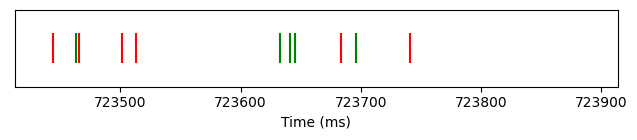

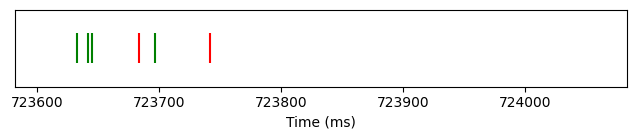

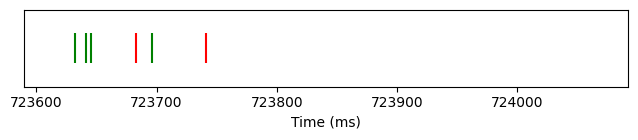

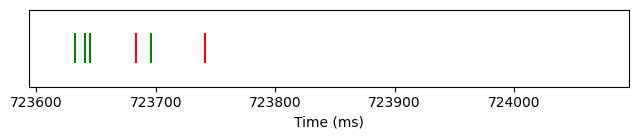

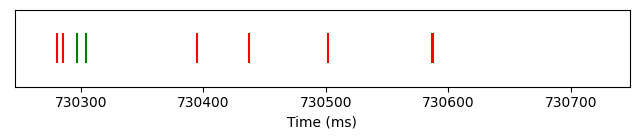

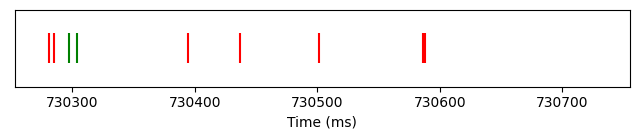

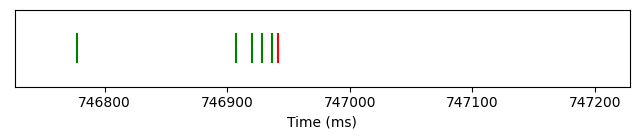

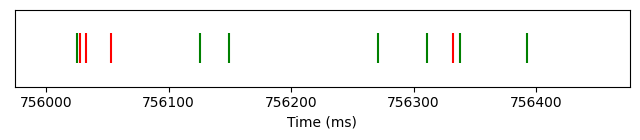

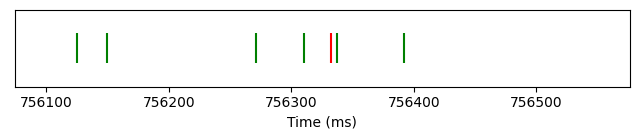

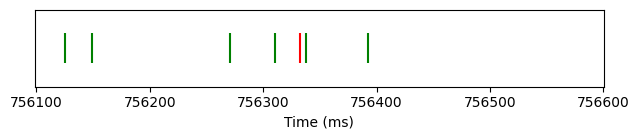

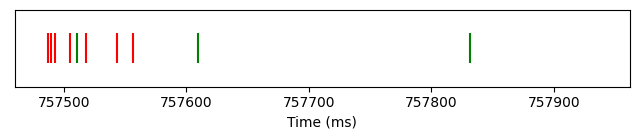

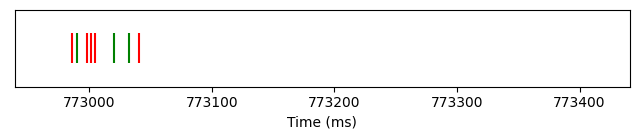

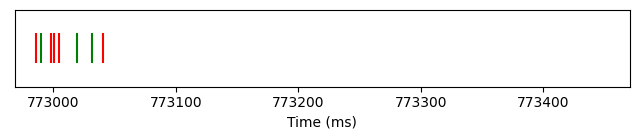

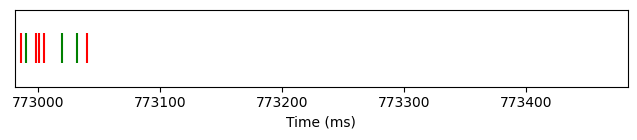

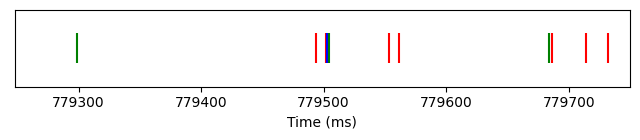

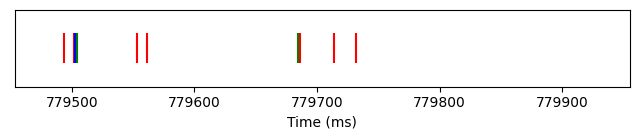

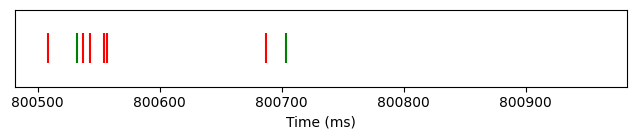

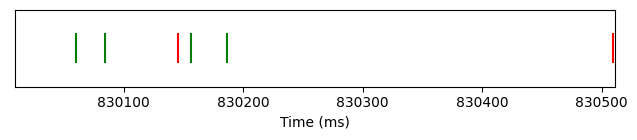

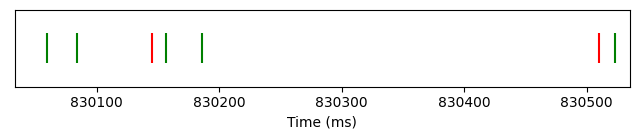

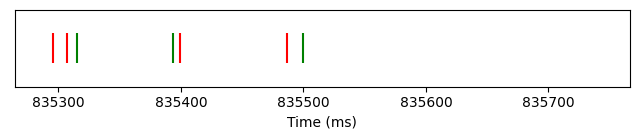

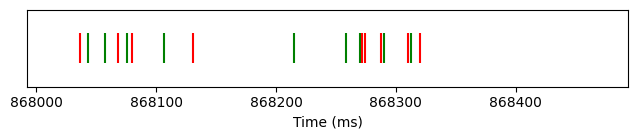

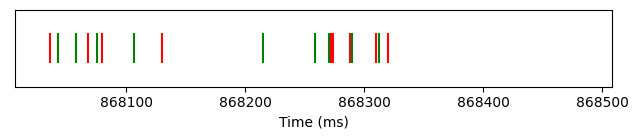

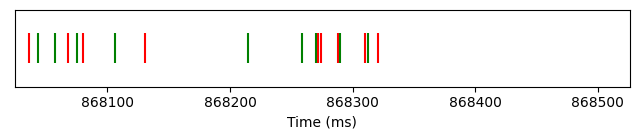

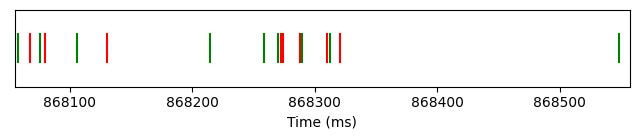

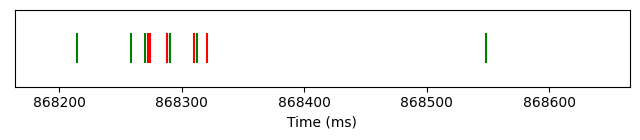

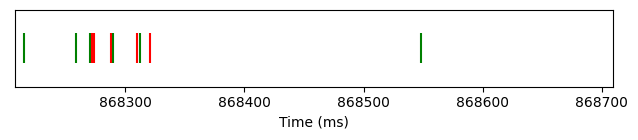

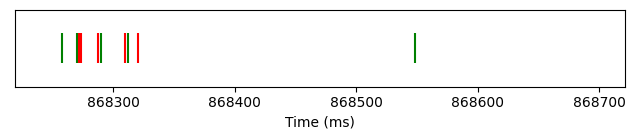

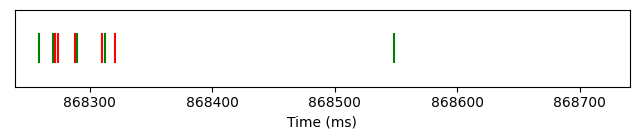

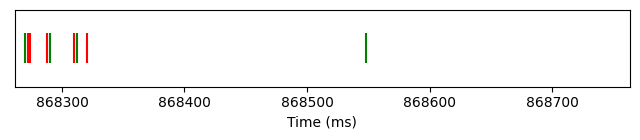

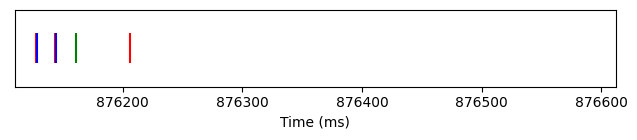

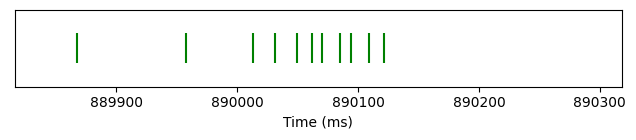

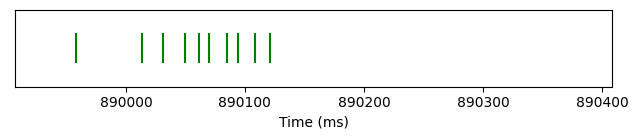

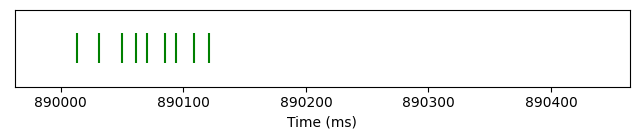

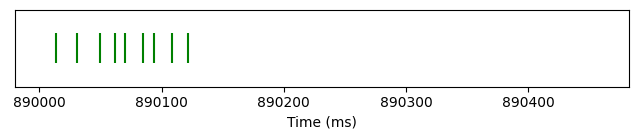

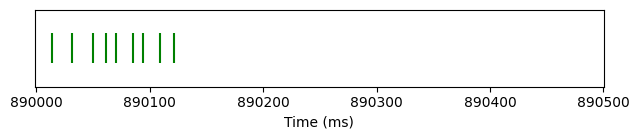

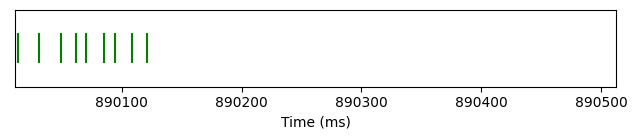

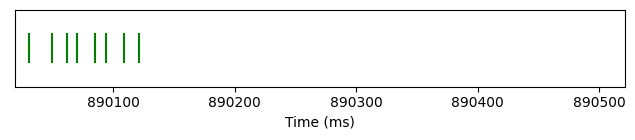

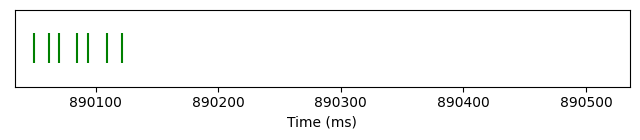

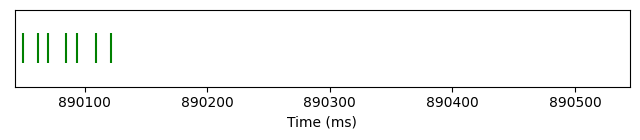

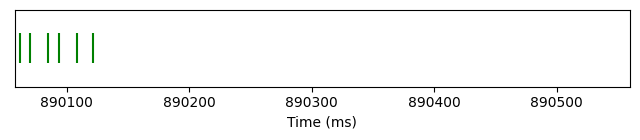

In [28]:
# spike_train = np.concatenate(Comparison.get_matching_spikes(units1[unit_idx], units2[idx_12[unit_idx]]))
spike_train = np.concatenate(Comparison.get_matching_spikes(units1[128], units2[309]))
spike_train = np.sort(spike_train)

print(len(units1[128]))
print(len(units2[309]))

# for start_ms in units1[unit_idx]:
#     end_ms = start_ms + duration
#     left = np.searchsorted(spike_train, start_ms, side="left")
#     right = np.searchsorted(spike_train, end_ms, side="right")
#     count = right - left
#     if count < min_spikes: continue
#     raster(unit_idx, start_ms, end_ms)
# for start_ms in range(0, int(recording.get_total_duration() * 1000)-duration+1, duration):
#     end_ms = start_ms + duration
#     if count_spikes(spike_train, start_ms, end_ms) < min_spikes: continue
#     raster(128, start_ms, end_ms)

for start_ms in Comparison.get_matching_spikes(units1[128], units2[309])[0]:
    start_ms -= 50
    end_ms = start_ms + duration
    if count_spikes(spike_train, start_ms, end_ms) < min_spikes: continue
    raster(128, start_ms, end_ms)

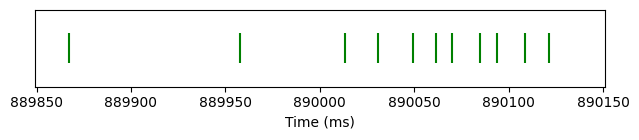

In [39]:
raster(128, 889850, 890150)

In [263]:
def count_spikes_exclusive(spike_train, start_ms, end_ms):  # Don't include end_ms in counting
    left = np.searchsorted(spike_train, start_ms, side="left")
    right = np.searchsorted(spike_train, end_ms, side="left")
    return right - left

counts_matching = []
counts_spikes1 = []
counts_spikes2 = []

for idx in tqdm(range(len(units1))):
    matching, spikes1, spikes2 = Comparison.get_matching_spikes(units1[idx], units2[idx_12[idx]])
    for start_ms in range(0, int(recording.get_total_duration())*1000 - duration + 1, duration):
        cm = count_spikes_exclusive(matching, start_ms, start_ms+duration)
        counts_matching.append(cm)
        counts_spikes1.append(count_spikes_exclusive(spikes1, start_ms, start_ms+duration))
        counts_spikes2.append(count_spikes_exclusive(spikes2, start_ms, start_ms+duration))

  0%|          | 0/141 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [259]:
np.sum(counts_spikes1) / np.flatnonzero(counts_spikes1).size

1.4924671407321577

In [260]:
np.sum(counts_spikes2) / np.flatnonzero(counts_spikes2).size

1.699280895132854

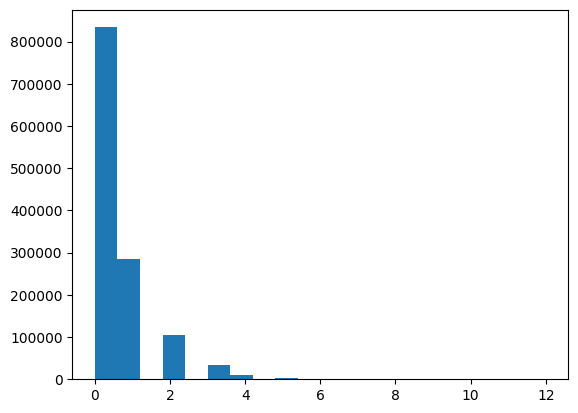

In [254]:
plt.hist(counts_spikes1, bins=20)
plt.show()

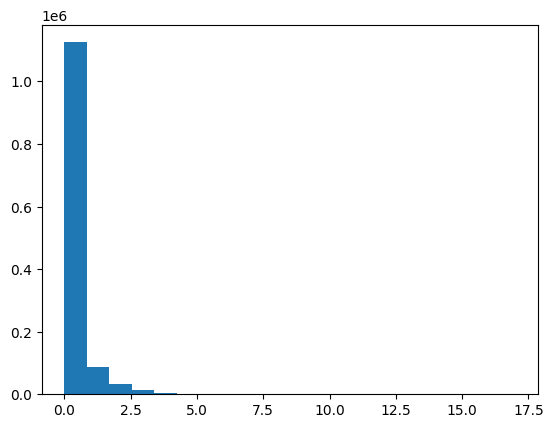

In [253]:
plt.hist(counts_spikes2, bins=20)
plt.show()